<b>Installing dependencies</b>

In [81]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,  accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.utils import pad_sequences
import tensorflow as tf

In [2]:
#Loading the training, validation and testing data
train=pd.read_csv("train.csv")
val=pd.read_csv("val.csv")
test=pd.read_csv("test.csv")

In [44]:
y_train,X_train=train["label"],train["message"]
y_val,X_val=val["label"],val["message"]
y_test,X_test=val["label"],val["message"]

In [4]:
print("Train size =",len(X_train))
print("Validation size =",len(X_val))
print("Test size =",len(X_test))

Train size = 2786
Validation size = 1114
Test size = 1114


<h3><b>First model : Using a Random Forest Classifier with Tfidf encodings</b></h3>

In [5]:
#Using TfidfVectorizer with 500 features
tfidf=TfidfVectorizer(max_features=500)
encoded_X_train=tfidf.fit_transform(X_train)

In [6]:
encoded_X_val=tfidf.fit_transform(X_val)

In [7]:
encoded_X_test=tfidf.fit_transform(X_test)

In [116]:
#Converting categorical variable into a numerical variable
y_train=y_train.replace("spam",1)
y_train=y_train.replace("ham",0)

In [117]:
y_val=y_val.replace("spam",1)
y_val=y_val.replace("ham",0)

In [118]:
y_test=y_test.replace("spam",1)
y_test=y_test.replace("ham",0)

In [90]:
from sklearn.ensemble import RandomForestClassifier

#Using a Random Forest Classifier with 500 estimators
rfc = RandomForestClassifier(n_estimators=500, random_state=1)

rfc.fit(encoded_X_train,y_train)


RandomForestClassifier(n_estimators=500, random_state=1)

In [91]:
y_pred=rfc.predict(encoded_X_test)
print(accuracy_score(y_test,y_pred))

0.8608617594254937


In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       959
           1       0.50      0.34      0.41       155

    accuracy                           0.86      1114
   macro avg       0.70      0.64      0.66      1114
weighted avg       0.84      0.86      0.85      1114



<h3><b>Second model : Logistic regression with embeddings using a transformer model</b></h3>

In [74]:
!pip install sentence_transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8484370877d9c32e4ce18ee7afaf45aa8312db4c498ff10b741d6798dd150364
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence_transformers


In [76]:
from sentence_transformers import SentenceTransformer

#Pre-trained model to evaluate the embeddings of the text data
model = SentenceTransformer('all-mpnet-base-v2')


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [115]:
y_train,X_train=train["label"],train["message"]
y_val,X_val=val["label"],val["message"]
y_test,X_test=val["label"],val["message"]

In [79]:
#Encoding the training data
embedded_X_train=model.encode(X_train)

In [80]:
#Encoding the testing data
embedded_X_test=model.encode(X_test)

In [82]:
#Using a vanilla Logistic Regression model
lgr=LogisticRegression()

In [86]:
lgr.fit(embedded_X_train,y_train)

LogisticRegression()

In [87]:
y_pred=lgr.predict(embedded_X_test)

In [88]:
print(accuracy_score(y_test,y_pred))

0.9757630161579892


In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       959
           1       0.98      0.85      0.91       155

    accuracy                           0.98      1114
   macro avg       0.98      0.92      0.95      1114
weighted avg       0.98      0.98      0.98      1114



<h3><b>Third model: Building an LSTM based Neural Network with GloVe embeddings </b></h3>

In [13]:
#Downloading GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-01-21 04:32:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-01-21 04:32:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-21 04:32:45--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [14]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [93]:
#Using the GloVe embeddings of 100 dimensions
import numpy as np
embeddings_dict = {}
with open("glove.6B.100d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

<b>We will use a 1000*100 embedding matrix, with 1000 max features and 100 dimensions.  </b>

In [94]:
all_embs = np.stack(embeddings_dict.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [95]:
max_features = 1000
maxlen = 100

In [96]:
#Using TensorFlow tokenizer to tokenize the training data
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=maxlen)

In [97]:
#tokenizing the validation data
tokenized_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(tokenized_val, maxlen=maxlen)

In [98]:
#Creating the embedding matrix
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [99]:
embedding_matrix.shape

(1000, 100)

In [100]:
batch_size = 64
epochs = 10
embed_size = 100

<b>Building the model</b>

In [110]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))

#First LSTM layer
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))

#Second LSTM layer
#Increasing recurrent_dropout and dropout from 0.1 to 0.2 to reduce overfitting
model.add(LSTM(units=64 , recurrent_dropout = 0.2 , dropout = 0.2))

model.add(Dense(units = 32 , activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))

#Using Adam optimizer and Binary Crossentropy as loss function for classification
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          100000    
                                                                 
 lstm_8 (LSTM)               (None, 100, 128)          117248    
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 268,769
Trainable params: 168,769
Non-trainable params: 100,000
_________________________________________________________________


In [112]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_val,y_val) , epochs = epochs)

Epoch 1/10
44/44 [==============================] - 37s 746ms/step - loss: 0.2402 - accuracy: 0.9106 - val_loss: 0.1142 - val_accuracy: 0.9668
Epoch 2/10
44/44 [==============================] - 32s 733ms/step - loss: 0.0802 - accuracy: 0.9738 - val_loss: 0.1035 - val_accuracy: 0.9677
Epoch 3/10
44/44 [==============================] - 32s 737ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0961 - val_accuracy: 0.9749
Epoch 4/10
44/44 [==============================] - 34s 768ms/step - loss: 0.0382 - accuracy: 0.9889 - val_loss: 0.0924 - val_accuracy: 0.9731
Epoch 5/10
44/44 [==============================] - 50s 1s/step - loss: 0.0346 - accuracy: 0.9885 - val_loss: 0.0925 - val_accuracy: 0.9740
Epoch 6/10
44/44 [==============================] - 55s 1s/step - loss: 0.0282 - accuracy: 0.9889 - val_loss: 0.1115 - val_accuracy: 0.9731
Epoch 7/10
44/44 [==============================] - 44s 1s/step - loss: 0.0279 - accuracy: 0.9925 - val_loss: 0.1002 - val_accuracy: 0.9758
Epoch 8/

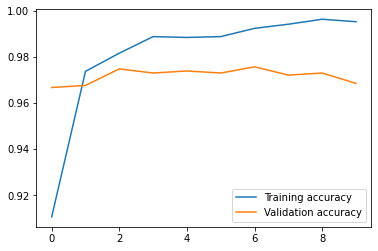

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

In [119]:
#Tokenizing testing data
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [120]:
y_pred=model.predict(X_test)

35/35 [==============================] - 2s 57ms/step


In [121]:
#Binarizing y_pred
for i in range(len(y_pred)): 
  if y_pred[i]<0.5:
    y_pred[i]=0
  else:
    y_pred[i]=1

In [122]:
#Testing accuracy
print(accuracy_score(y_test,y_pred))

0.9685816876122083


In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       959
           1       0.89      0.88      0.89       155

    accuracy                           0.97      1114
   macro avg       0.94      0.93      0.93      1114
weighted avg       0.97      0.97      0.97      1114



The second model, i.e., Logistic Regression with Transformer based embeddings has the highest accuracy on the testing data (98%), so we will select that for Spam Filtering.